In [59]:
import yfinance as yf 
import pandas as pd
from matplotlib import pylab as plt
import numpy as np
from datetime import datetime 

import quandl

import seaborn as sns

import sys

from scipy.stats import norm
import pandas_datareader.data as web

from sklearn.linear_model import LinearRegression
from sklearn import metrics

# Analysis of the Drivers of Gold

This script looks for what drives the price of Gold, which should be inflation since Gold is a dead asset. With low inflation of the monetary system gold should perform poorly. But is this true? Lets find out.

In [14]:
Gold_tmp = quandl.get("LBMA/GOLD", authtoken="6rNSyTM5R4g7_B7XSyQW")
M2_tmp = web.DataReader("M2NS", "fred", datetime(1960, 1, 1))

In [19]:
Gold =Gold_tmp['USD (AM)']

Gold = Gold.resample('M').last()

In [65]:
data_tmp = pd.concat([Gold, M2_tmp], axis = 1)
data_tmp = data_tmp.ffill()
data_tmp = data_tmp.dropna()

dates_month = pd.bdate_range(data_tmp.index.min(), data_tmp.index.max(), freq='1M')
data = data_tmp[data_tmp.index.isin(dates_month)]

data = data.pct_change(3)
data = data.dropna()
data.columns = ['Gold', 'M2']

Correlation: 0.01456413898767907


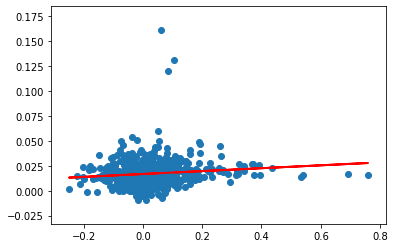

In [66]:
regressor = LinearRegression()  
regressor.fit(data['Gold'].values.reshape(-1,1), data['M2'].values.reshape(-1,1))

y_pred = regressor.predict(data['Gold'].values.reshape(-1,1))

plt.scatter(data['Gold'], data['M2'])
plt.plot(data['Gold'], y_pred, color='red', linewidth=2)

print("Correlation: " + str(float(regressor.coef_)))